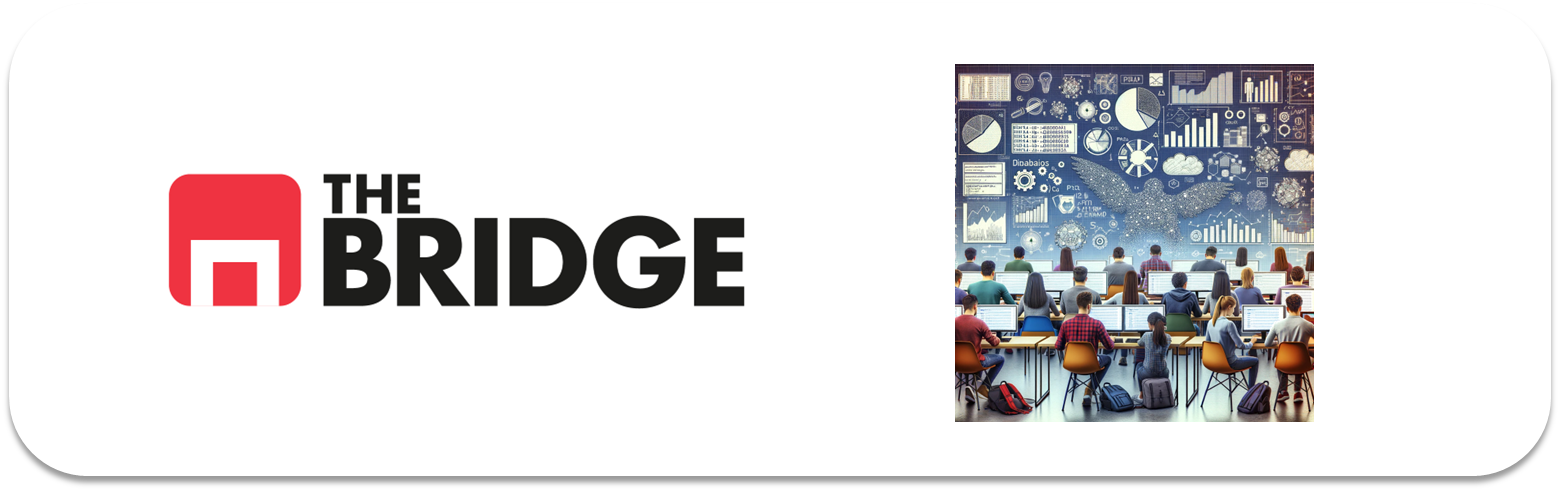

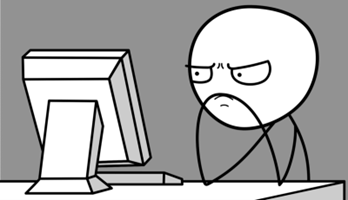

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [27]:
df = pd.read_csv("./data/advertising_ml.csv")

In [28]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23 años,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33 años,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48 años,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30 años,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20 años,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Problema de clasificaion supervisada.
Variable target: "Clicked on AD"

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

Columnas:

*    Daily Time Spent on Site  Time spent on site (min?)
*    Age                       Age of user (years) 
*    Area Income              
*    Daily Internet Usage      Seconds
* Ad Topic Line             
* City                      City user lives in
* Male                     0,1 yes or no 
* Country                   Country user lives in
* Timestamp                 Time of Ad 
* Clicked on Ad              0,1 yes or no 

In [29]:


# Compute cardinality of each column
cardinality = df.nunique().sort_values()

# Classify columns as categorical or numerical based on type and cardinality
categoricas = []
numericas = []

for col in df.columns:
    tipo = df[col].dtype
    n_unicos = df[col].nunique()
    
    if tipo == 'object' or tipo.name == 'category' or tipo == 'bool':
        categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(tipo):
        if n_unicos < 10:
            categoricas.append(col)
        else:
            numericas.append(col)
    else:
        categoricas.append(col)

# Create summary
summary = {
    'Column Name': df.columns,
    'Data Type': [df[col].dtype for col in df.columns],
    'Cardinality': [df[col].nunique() for col in df.columns],
    'Classification': ['Categórica' if col in categoricas else 'Numérica' for col in df.columns]
}

summary_df = pd.DataFrame(summary)




In [30]:
summary_df 

,Column Name,Data Type,Cardinality,Classification
0,Daily Time Spent on Site,float64,900,Numérica
1,Age,object,83,Categórica
2,Area Income,float64,1000,Numérica
3,Daily Internet Usage,float64,966,Numérica
4,Ad Topic Line,object,1000,Categórica
5,City,object,969,Categórica
6,Male,int64,2,Categórica
7,Country,object,237,Categórica
8,Timestamp,object,1000,Categórica
9,Clicked on Ad,int64,2,Categórica


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [32]:
# Ensure 'Age' is string before using .str methods
df['Age'] = df['Age'].astype(str)
df['Age'] = df['Age'].str.replace('years', '', regex=False).str.strip()
df['Age'] = df['Age'].str.replace('años', '', regex=False).str.strip()

# Convert to numeric now that "years" is removed
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop duplicates, but keep rows with NaNs as instructed
df_cleaned = df.drop_duplicates()







In [35]:

# Compute cardinality of each column
cardinality = df_cleaned.nunique().sort_values()

# Classify columns as categorical or numerical based on type and cardinality
categoricas = []
numericas = []

for col in df.columns:
    tipo = df[col].dtype
    n_unicos = df[col].nunique()
    
    if tipo == 'object' or tipo.name == 'category' or tipo == 'bool':
        categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(tipo):
        if n_unicos < 10:
            categoricas.append(col)
        else:
            numericas.append(col)
    else:
        categoricas.append(col)

# Create summary
summary = {
    'Column Name': df_cleaned.columns,
    'Data Type': [df_cleaned[col].dtype for col in df_cleaned.columns],
    'Cardinality': [df[col].nunique() for col in df.columns],
    'Classification': ['Categórica' if col in categoricas else 'Numérica' for col in df_cleaned.columns]
}

summary_df = pd.DataFrame(summary)


In [38]:
summary_df

,Column Name,Data Type,Cardinality,Classification
0,Daily Time Spent on Site,float64,900,Numérica
1,Age,int64,43,Numérica
2,Area Income,float64,1000,Numérica
3,Daily Internet Usage,float64,966,Numérica
4,Ad Topic Line,object,1000,Categórica
5,City,object,969,Categórica
6,Male,int64,2,Categórica
7,Country,object,237,Categórica
8,Timestamp,object,1000,Categórica
9,Clicked on Ad,int64,2,Categórica


In [36]:
df_cleaned.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [40]:
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

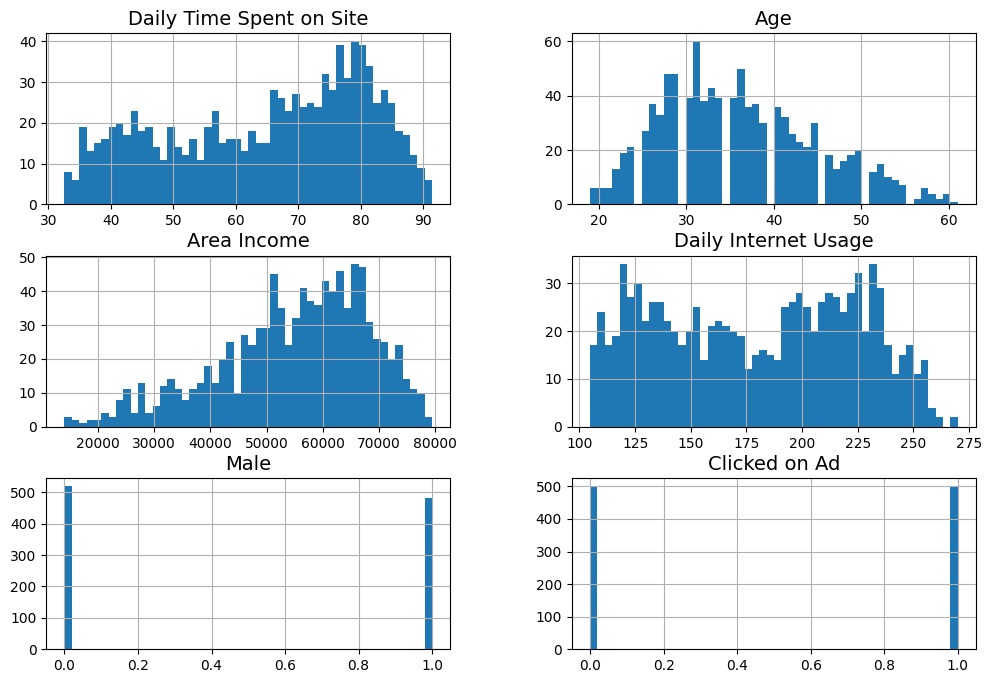

In [41]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

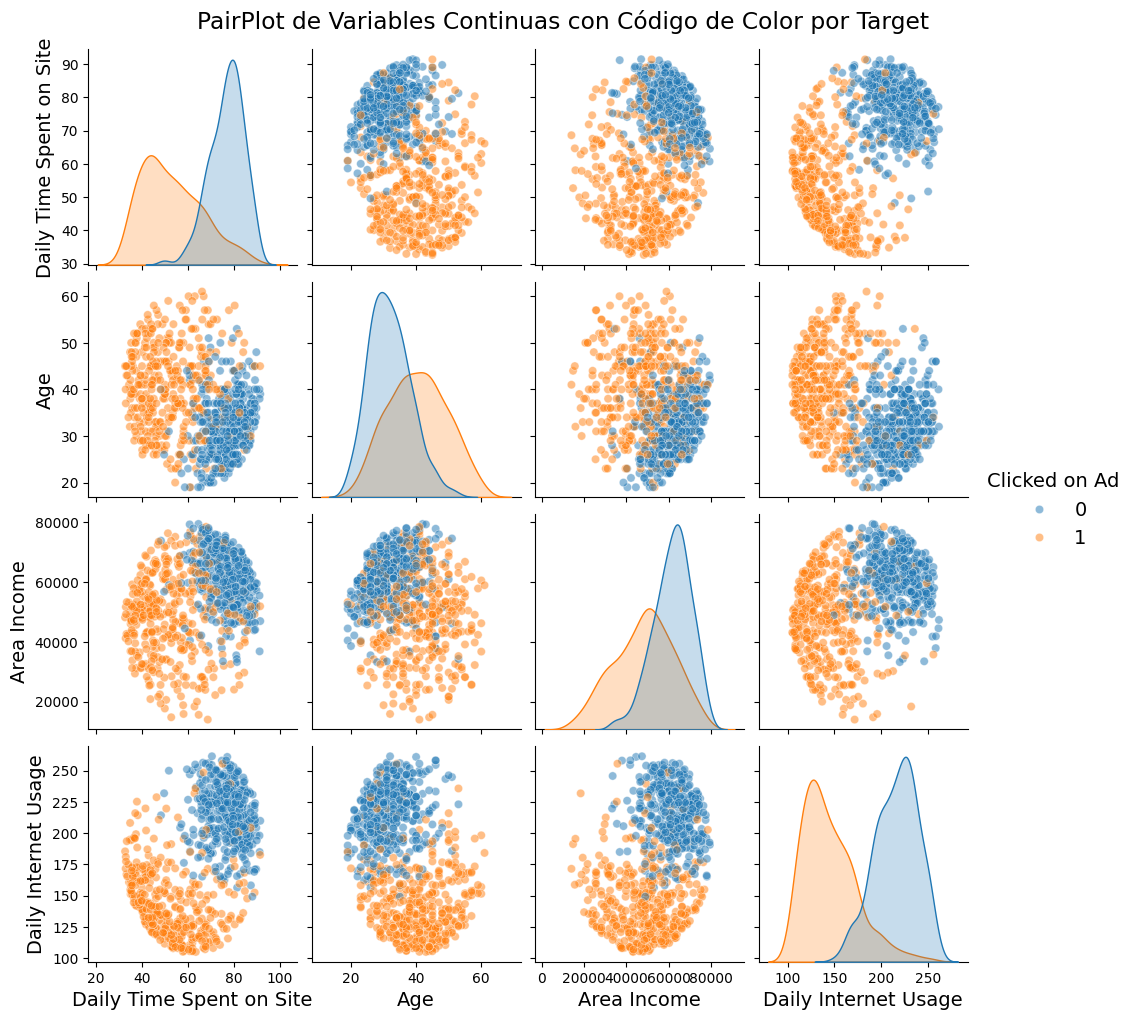

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas y continuas
columnas_continuas = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Agregar la variable target
columnas_continuas.append('Clicked on Ad')

# Filtrar el DataFrame limpio por esas columnas
df_plot = train_set[columnas_continuas]

# Crear el PairPlot
sns.pairplot(df_plot, hue='Clicked on Ad', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('PairPlot de Variables Continuas con Código de Color por Target', y=1.02)
plt.show()


In [44]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Age                         0.482848
Male                       -0.043798
Area Income                -0.498504
Daily Time Spent on Site   -0.745492
Daily Internet Usage       -0.812130
Name: Clicked on Ad, dtype: float64

In [45]:
columnas = corr_matrix['Clicked on Ad'][corr_matrix['Clicked on Ad'] > 0.07].index.to_list()

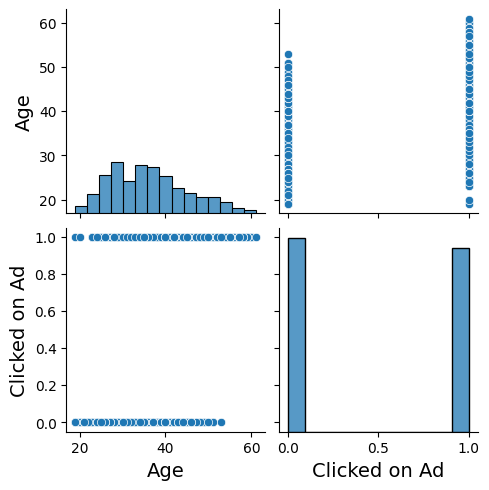

In [46]:
sns.pairplot(train_set[columnas]);

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

#Features: 

Age                         0.482848
Male                       -0.043798
Area Income                -0.498504
Daily Time Spent on Site   -0.745492
Daily Internet Usage       -0.812130
Name: Clicked on Ad, dtype: float64